In [4]:
import os
import subprocess
import glob
import pandas as pd
import io
import matplotlib.pyplot as plt
import json
import re

In [5]:
fileNames = glob.glob(os.path.join('..', 'measurements', '20250226-111240991', '*.json'))
dcts = []
for fileName in fileNames:
    with open(fileName, 'r') as file:
        dct = json.load(file)
        dct['name'] = os.path.basename(fileName)
        dcts.append(dct)
        
dfsWithNames = []
for dct in dcts:        
    df = pd.DataFrame(dct['output'])
    dfsWithNames.append({ 'name': dct['name'], 'df': df })

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


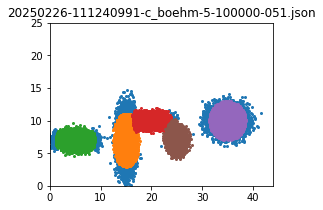

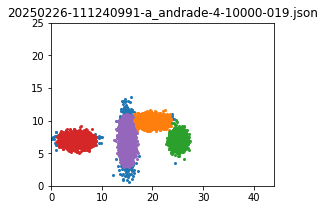

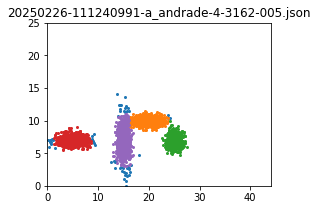

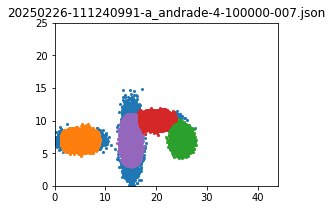

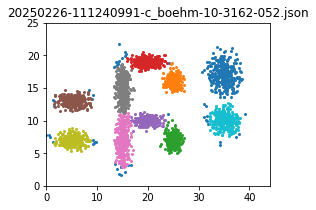

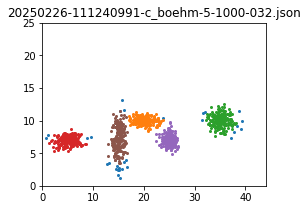

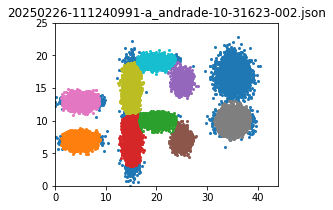

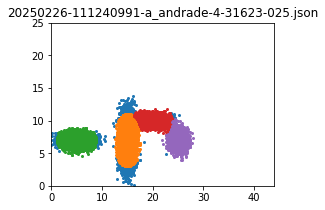

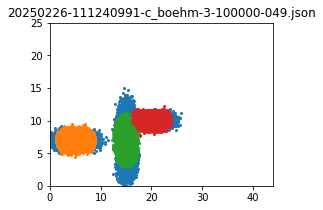

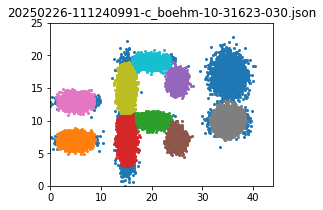

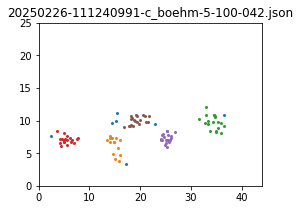

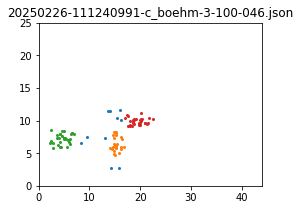

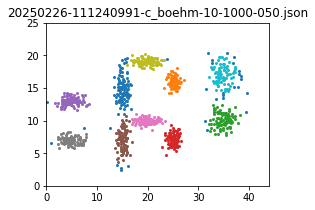

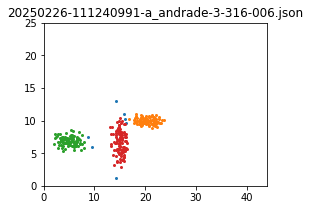

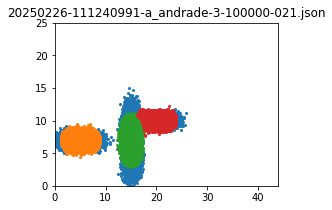

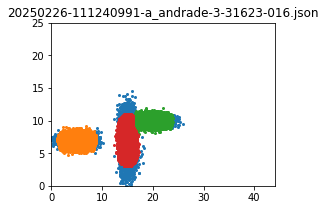

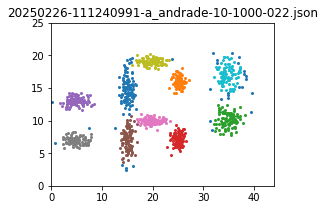

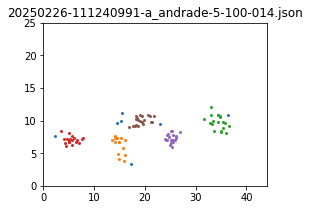

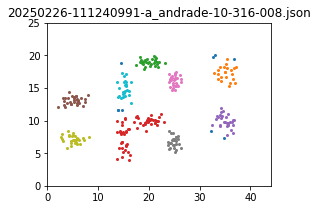

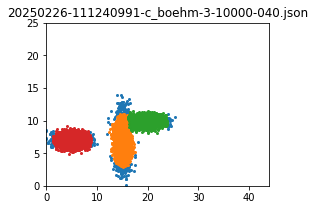

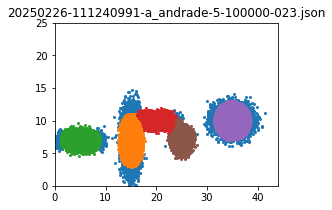

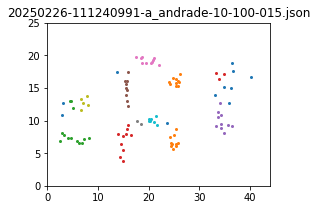

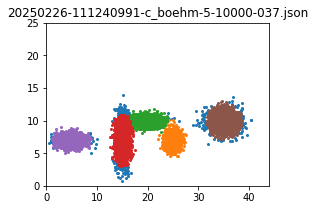

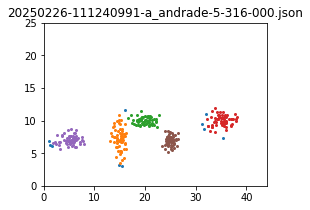

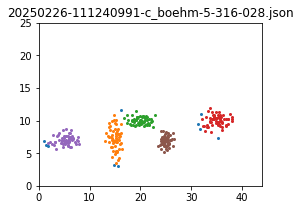

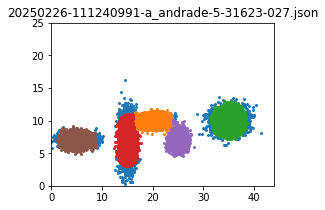

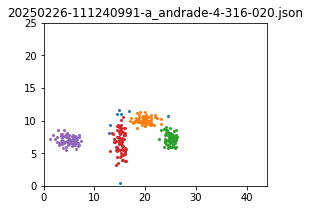

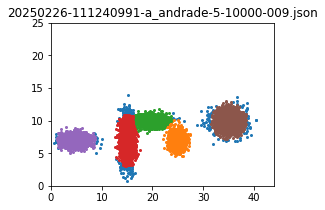

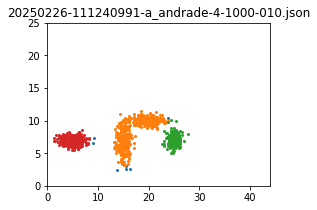

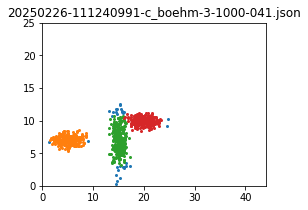

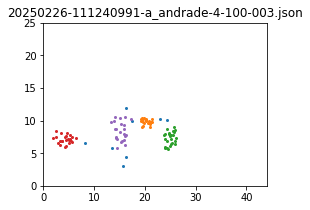

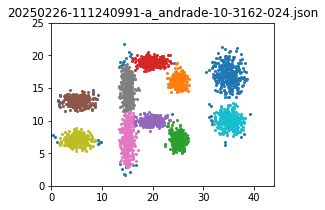

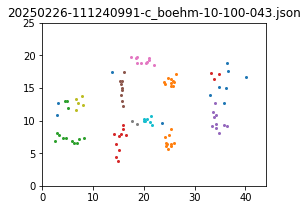

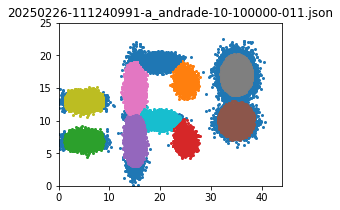

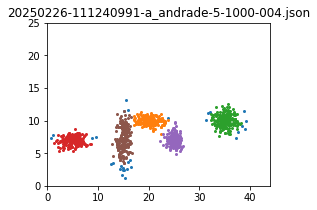

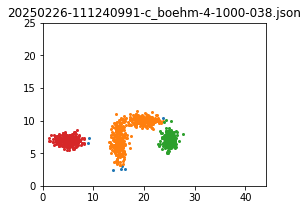

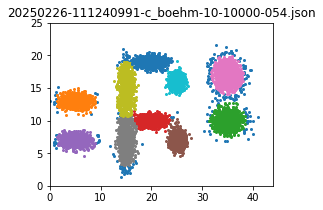

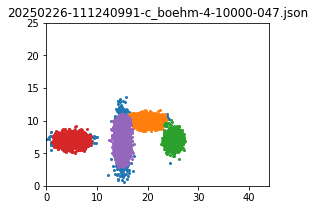

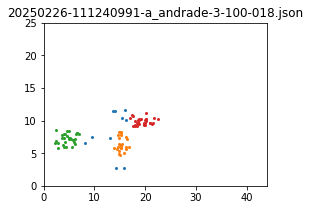

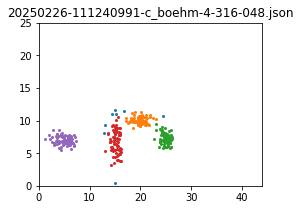

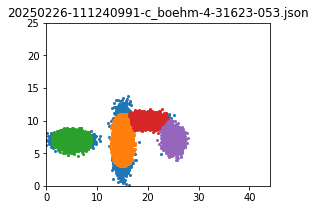

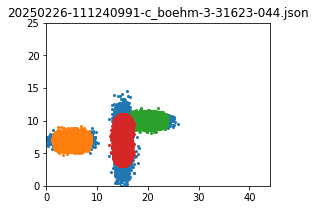

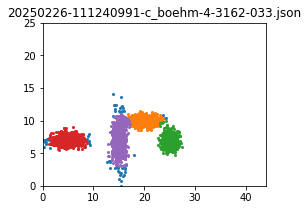

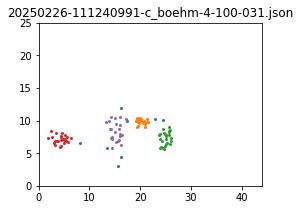

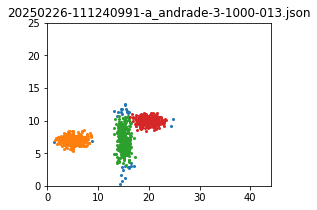

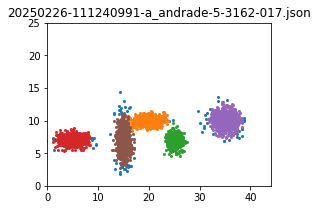

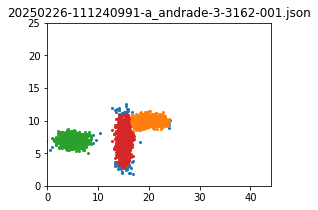

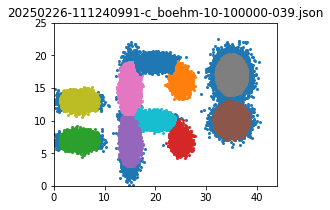

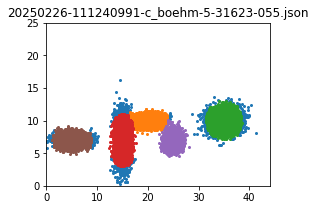

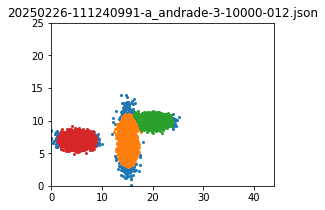

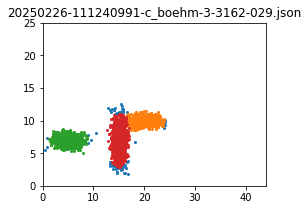

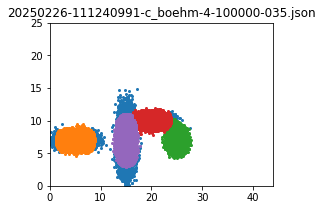

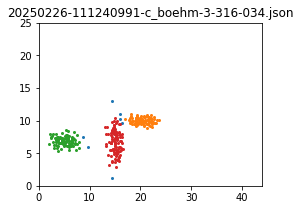

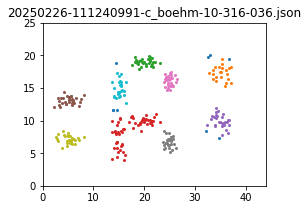

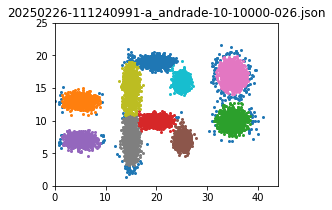

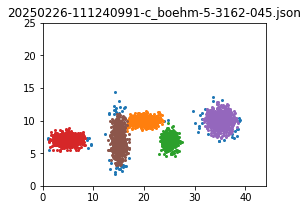

In [6]:
for entry in dfsWithNames:
    df = entry['df']
    name = entry['name']
    clusters = df.groupby('cluster_id')

    plt.figure(figsize=(4,3))
    for clusterId, grp in clusters:
        plt.scatter(grp['x'], grp['y'], s=4)
        plt.xlim(0,44)
        plt.ylim(0,25)
        plt.title(name)
    plt.plot()

In [8]:
def makeProfileDf():

    def extractNClusters(s):
        pattern = r'.*-([^-]+)-(\d+)-(\d+)-(\d+).json'
        match = re.match(pattern, s)
        kernel, nClusters, nPoints, idx = match.groups()
        return nClusters
        
    def extractNPoints(s):
        pattern = r'.*-([^-]+)-(\d+)-(\d+)-(\d+).json'
        match = re.match(pattern, s)
        kernel, nClusters, nPoints, idx = match.groups()
        return nPoints
        
    def extractKernel(s):
        pattern = r'.*-([^-]+)-(\d+)-(\d+)-(\d+).json'
        match = re.match(pattern, s)
        kernel, nClusters, nPoints, idx = match.groups()
        return kernel

    nameLst = [ dct['name'] for dct in dcts ]
    nClustersLst = [ int(extractNClusters(dct['name'])) for dct in dcts ]
    nPointsLst = [ int(extractNPoints(dct['name'])) for dct in dcts ]
    timeTotalLst = [ dct['profile']['timeTotal'] for dct in dcts ]
    kernelLst = [ extractKernel(dct['name']) for dct in dcts ]
    return pd.DataFrame({
        'name': nameLst,
        'kernel': kernelLst,
        'n_clusters': nClustersLst,
        'n_points': nPointsLst,
        'time_total': timeTotalLst
    })

profileDf = makeProfileDf()

In [9]:
profileDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
kernel        56 non-null object
n_clusters    56 non-null int64
n_points      56 non-null int64
name          56 non-null object
time_total    56 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ KB


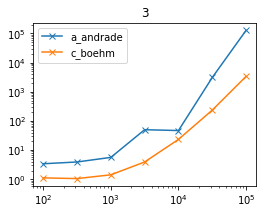

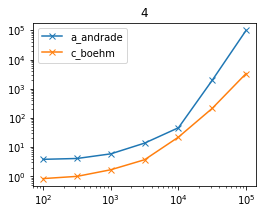

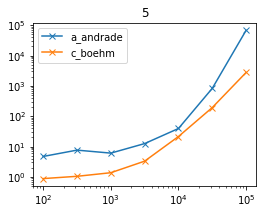

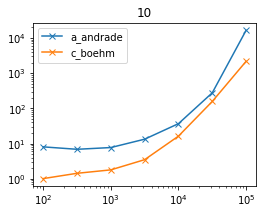

In [10]:
for nClusters, grp in profileDf.groupby('n_clusters'):
    plt.figure(figsize=(4,3))
    for kernel, ggrp in grp.groupby('kernel'):
        ggrp = ggrp.sort_values('n_points')
        plt.plot(ggrp['n_points'], ggrp['time_total'], label=kernel, marker='x')
    plt.title(f'{nClusters}')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()

In [ ]:
for dct in dcts:        
    df = pd.DataFrame(dct['output'])
    dfsWithNames.append({ 'name': dct['name'], 'df': df })

In [27]:
for dct in dcts:
    n = dct['name']
    pattern = r'.*-([^-]+)-(\d+)-(\d+)-(\d+).json'
    match = re.match(pattern, n)
    kernel, nClusters, nPoints, idx = match.groups()
    if len(set(dct['output']['cluster_id'])) - 1 != int(nClusters):
        print(n, nClusters, len(set(dct['output']['cluster_id'])) - 1)


20250226-111240991-a_andrade-10-316-008.json 10 9
20250226-111240991-a_andrade-10-100-015.json 10 14
20250226-111240991-a_andrade-4-1000-010.json 4 3
20250226-111240991-c_boehm-10-100-043.json 10 14
20250226-111240991-c_boehm-4-1000-038.json 4 3
20250226-111240991-c_boehm-10-316-036.json 10 9
